In [1]:
!pip install tabnet

Defaulting to user installation because normal site-packages is not writeable


In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tabnet

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [20]:
data = pd.read_csv("cardio_train.csv")
data = data.drop("id", axis=1)
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


# Outlier Detect and Handle Function

In [10]:
def outlier(coloumn):
    Q1 = coloumn.quantile(0.25)
    Q3 = coloumn.quantile(0.75)
    IQR = Q3 - Q1
    whisker_width = 1.5
    lower_whisker = Q1 -(whisker_width*IQR)
    upper_whisker = Q3 + (whisker_width*IQR)
    coloumn=np.where(coloumn>upper_whisker,upper_whisker,np.where(coloumn<lower_whisker,lower_whisker,coloumn))
    #sns.boxplot(coloumn)
    return coloumn

# Handle Outlier

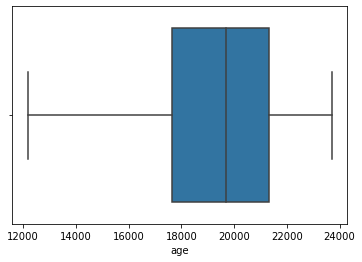

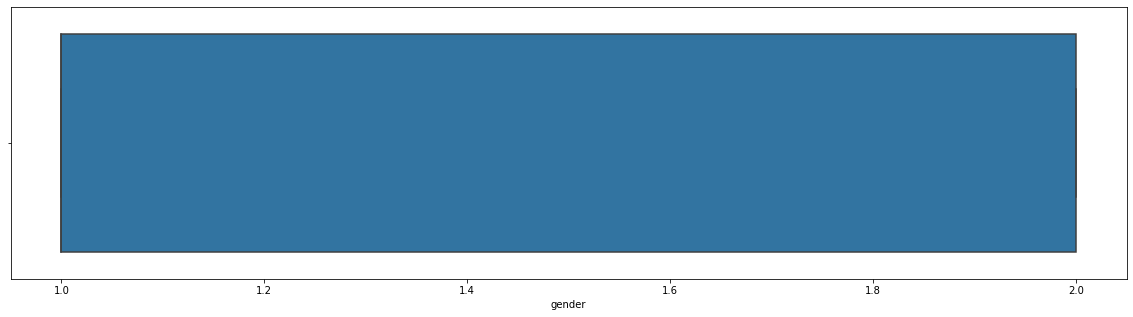

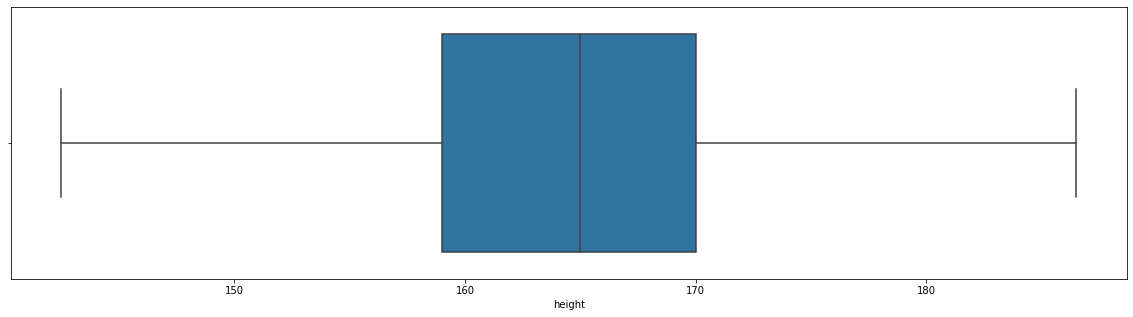

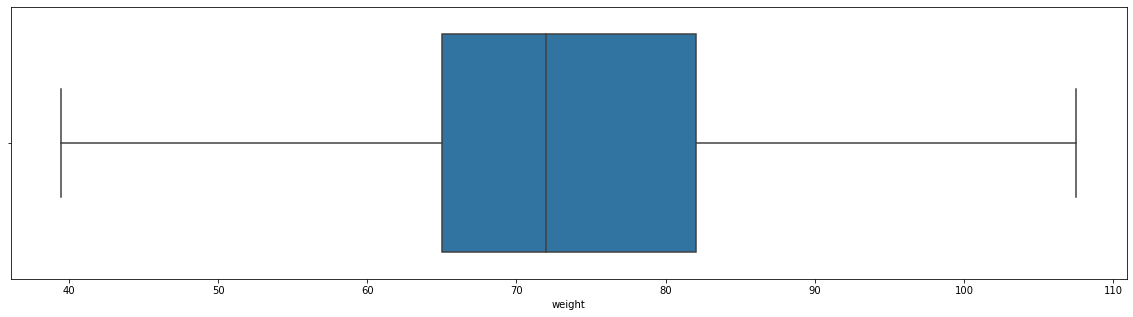

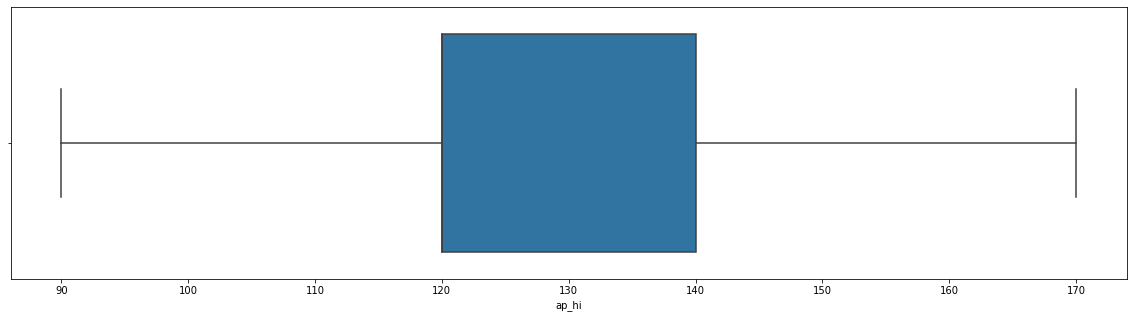

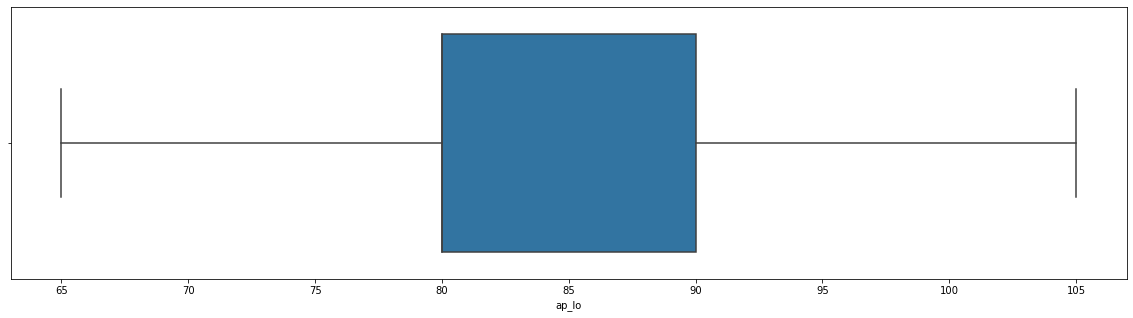

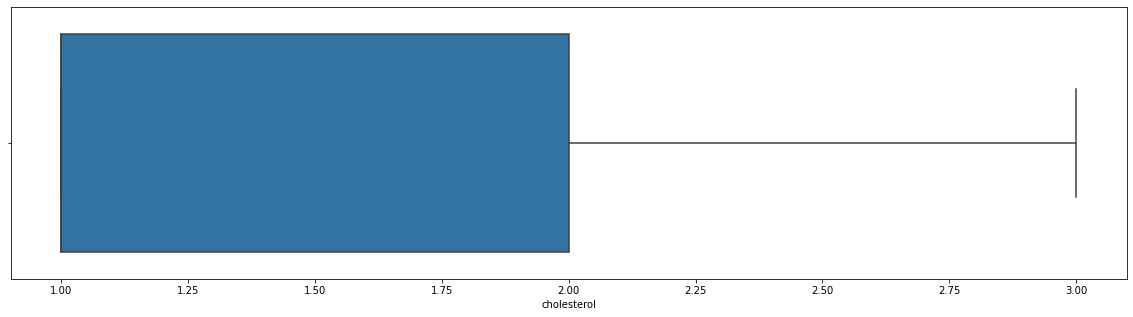

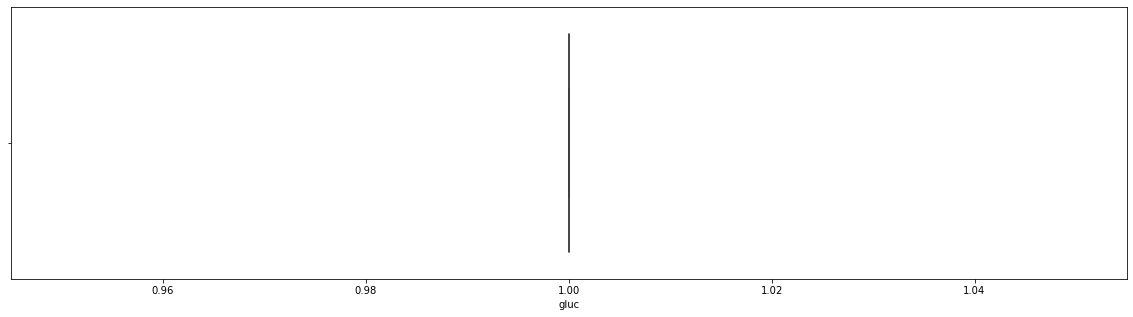

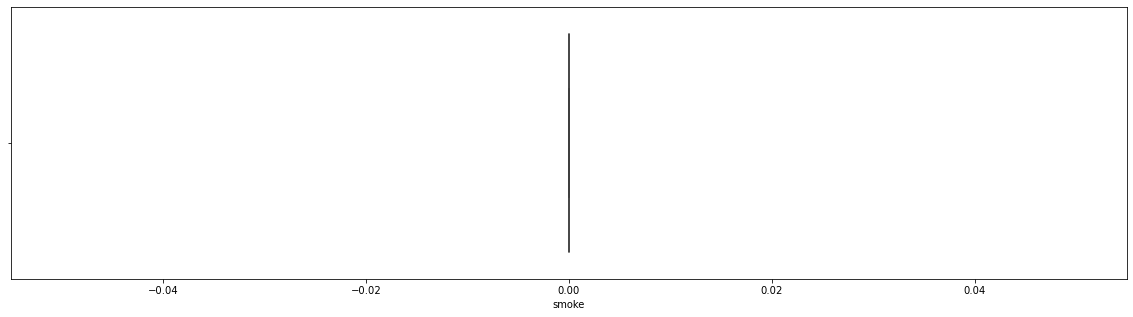

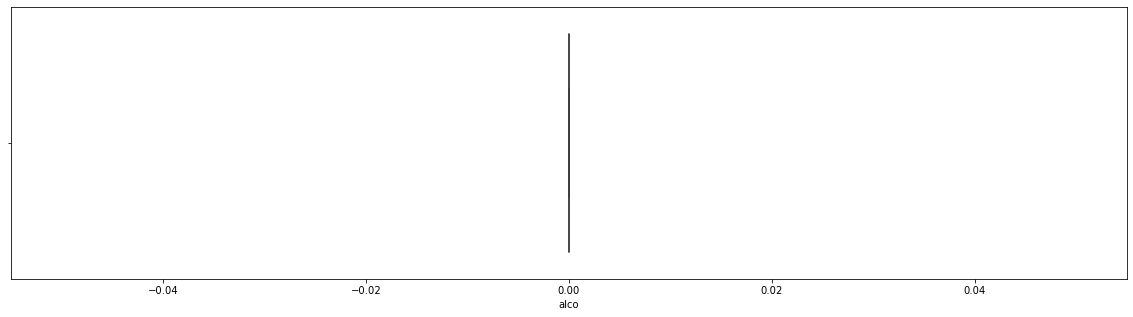

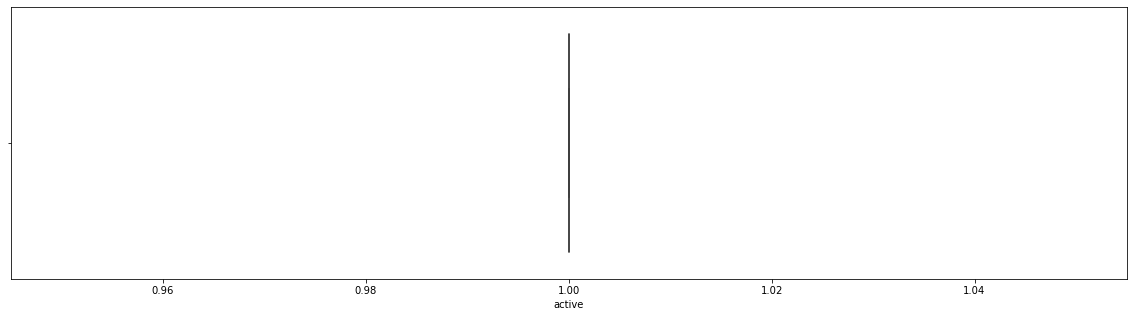

<Figure size 1440x360 with 0 Axes>

In [11]:
for i in data.iloc[:,1:-1]:
    data[i] = outlier(data[i])
    sns.boxplot(data[i])
    plt.figure(figsize=(20,5))

In [27]:
# Split data into train and test sets
train, test = train_test_split(data, test_size=0.2)

In [28]:
# Extract target and feature columns
y_train = train.pop("cardio")
y_test = test.pop("cardio")

In [29]:
# Define the feature columns
feature_columns = train.columns

In [30]:
# Standardize the feature data
scaler = StandardScaler()
train = scaler.fit_transform(train)
test = scaler.transform(test)

In [31]:
# Define the number of classes in the target variable
num_classes = len(np.unique(y_train))

In [43]:
# Create the TabNet model
model = tabnet.TabNetClassifier(feature_columns=feature_columns, num_classes=num_classes,
                                n_dense=1, n_features=train.shape[1],
                                n_jobs=-1,
                                learning_rate=0.05,
                                n_epochs=50,
                                scheduler_params={"step_size": 20})

TypeError: ('Keyword argument not understood:', 'n_dense')

In [24]:
# Train the model on the training data
model.fit(train, y_train)

NameError: name 'model' is not defined

In [ ]:
# Evaluate the model on the test data
test_predictions = model.predict(test)
print("Accuracy:", (test_predictions == y_test).mean())